In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_2004-2017/'

In [4]:
temp_z0_1_mod = xr.open_dataset(input_path + 'temp_z0_1_mod.nc').temp_z0_1_mod
print(temp_z0_1_mod)
temp_z0_1_slope_mod = xr.open_dataset(input_path + 'temp_z0_1_slope_mod.nc').temp_z0_1_slope_mod*10
print(temp_z0_1_slope_mod)
temp_z0_1_p_value_mod = xr.open_dataset(input_path + 'temp_z0_1_p_value_mod.nc').temp_z0_1_p_value_mod
print(temp_z0_1_p_value_mod)
temp_z0_1_std_err_mod = xr.open_dataset(input_path + 'temp_z0_1_std_err_mod.nc').temp_z0_1_std_err_mod*10
print(temp_z0_1_std_err_mod)

temp_z0_025_mod = xr.open_dataset(input_path + 'temp_z0_025_mod.nc').temp_z0_025_mod
print(temp_z0_025_mod)
temp_z0_025_slope_mod = xr.open_dataset(input_path + 'temp_z0_025_slope_mod.nc').temp_z0_025_slope_mod*10
print(temp_z0_025_slope_mod)
temp_z0_025_p_value_mod = xr.open_dataset(input_path + 'temp_z0_025_p_value_mod.nc').temp_z0_025_p_value_mod
print(temp_z0_025_p_value_mod)
temp_z0_025_std_err_mod = xr.open_dataset(input_path + 'temp_z0_025_std_err_mod.nc').temp_z0_025_std_err_mod*10
print(temp_z0_025_std_err_mod)

temp_z0_01_mod = xr.open_dataset(input_path + 'temp_z0_01_mod.nc').temp_z0_01_mod
print(temp_z0_01_mod)
temp_z0_01_slope_mod = xr.open_dataset(input_path + 'temp_z0_01_slope_mod.nc').temp_z0_01_slope_mod*10
print(temp_z0_01_slope_mod)
temp_z0_01_p_value_mod = xr.open_dataset(input_path + 'temp_z0_01_p_value_mod.nc').temp_z0_01_p_value_mod
print(temp_z0_01_p_value_mod)
temp_z0_01_std_err_mod = xr.open_dataset(input_path + 'temp_z0_01_std_err_mod.nc').temp_z0_01_std_err_mod*10
print(temp_z0_01_std_err_mod)

<xarray.DataArray 'temp_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 14)>
[201600 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 2244 2245 2246 2247 2248 ... 2253 2254 2255 2256 2257
<xarray.DataArray 'temp_z0_1_slope_mod' (yt_ocean: 160, xt_ocean: 90)>
array([[        nan,         nan,         nan, ..., -0.09247966,
        -0.09419133, -0.09416048],
       [        nan,         nan,         nan, ..., -0.09624909,
        -0.0988897 , -0.10031966],
       [        nan,         nan,         nan, ..., -0.09480504,
        -0.09886287, -0.10293814],
       ...,
       [ 0.25260774,  0.26091523,  0.26751642, ...,  0.11988311,
         0.10462633,  0.0924582 ],
       [ 0.27534032,  0.26833268,  0.26828975, ...,  0.10605965,
         0.0932483 ,  0.08155638],
       [ 0.24618161,  0.24973775,  0.2656961 , ...,  0.0

In [5]:
temp_z0_oisst = xr.open_dataset(input_path + 'temp_z0_oisst.nc').temp_z0_oisst
print(temp_z0_oisst)
temp_z0_slope_oisst = xr.open_dataset(input_path + 'temp_z0_slope_oisst.nc').temp_z0_slope_oisst*10
print(temp_z0_slope_oisst)
temp_z0_p_value_oisst = xr.open_dataset(input_path + 'temp_z0_p_value_oisst.nc').temp_z0_p_value_oisst
print(temp_z0_p_value_oisst)
temp_z0_std_err_oisst = xr.open_dataset(input_path + 'temp_z0_std_err_oisst.nc').temp_z0_std_err_oisst*10
print(temp_z0_std_err_oisst)

<xarray.DataArray 'temp_z0_oisst' (lat: 94, lon: 94, year: 14)>
[123704 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) float32 -271.5 -270.5 -269.5 -268.5 ... -180.5 -179.5 -178.5
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_slope_oisst' (lat: 94, lon: 94)>
array([[        nan,         nan,         nan, ..., -0.07857141,
        -0.09067772, -0.09168506],
       [        nan,         nan,         nan, ..., -0.10608058,
        -0.11846145, -0.12168498],
       [        nan,         nan,         nan, ..., -0.10419413,
        -0.10989005, -0.11051273],
       ...,
       [ 0.27320736,  0.29479771,  0.29542097, ...,  0.08893858,
         0.07781924,  0.08851347],
       [ 0.21585905,  0.23959678,  0.23351506, ...,  0.08688661,
         0.07272758,  0.08730714],
       [ 0.1574707 ,  0.17553057,  0.15141016, ...,  0.09745344,
         0

In [13]:
input_path2 = '/g/data/e14/erd561/Australia_3/'

temp_z0_global_oisst = xr.open_dataset(input_path2 + 'temp_z0_global_oisst.nc').temp_z0_global_oisst.sel(year=slice(2004,2017))
print(temp_z0_global_oisst)
temp_z0_1_global_mod = xr.open_dataset(input_path2 + 'temp_z0_1_global_mod.nc').temp_z0_1_global_mod.sel(year=slice(2004,2017))
print(temp_z0_1_global_mod)
temp_z0_025_global_mod = xr.open_dataset(input_path2 + 'temp_z0_025_global_mod.nc').temp_z0_025_global_mod.sel(year=slice(2004,2017))
print(temp_z0_025_global_mod)
temp_z0_01_global_mod = xr.open_dataset(input_path2 + 'temp_z0_01_global_mod.nc').temp_z0_01_global_mod.sel(year=slice(2004,2017))
print(temp_z0_01_global_mod)

year = temp_z0_global_oisst.year
print(year)

temp_z0_1_slope_global_mod, _, _, _, _ = stats.linregress(year, temp_z0_1_global_mod)
temp_z0_025_slope_global_mod, _, _, _, _ = stats.linregress(year, temp_z0_025_global_mod)
temp_z0_01_slope_global_mod, _, _, _, _ = stats.linregress(year, temp_z0_01_global_mod)
temp_z0_slope_global_oisst, _, _, _, _ = stats.linregress(year, temp_z0_global_oisst)

temp_z0_1_slope_global_mod = temp_z0_1_slope_global_mod*10
temp_z0_025_slope_global_mod = temp_z0_025_slope_global_mod*10
temp_z0_01_slope_global_mod = temp_z0_01_slope_global_mod*10
temp_z0_slope_global_oisst = temp_z0_slope_global_oisst*10

print(temp_z0_1_slope_global_mod)
print(temp_z0_025_slope_global_mod)
print(temp_z0_01_slope_global_mod)
print(temp_z0_slope_global_oisst)

<xarray.DataArray 'temp_z0_global_oisst' (year: 14)>
array([13.610552, 13.648863, 13.598807, 13.535508, 13.502669, 13.580406,
       13.603158, 13.525658, 13.587347, 13.628667, 13.699885, 13.747419,
       13.817865, 13.781374], dtype=float32)
Coordinates:
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_1_global_mod' (year: 14)>
array([14.959808, 15.010712, 15.015015, 14.955627, 14.902802, 15.007111,
       15.058533, 14.937958, 15.00412 , 15.029053, 15.057739, 15.164337,
       15.263367, 15.150818], dtype=float32)
Coordinates:
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_025_global_mod' (year: 14)>
array([11.148499, 11.189148, 11.201447, 11.165009, 11.117493, 11.173279,
       11.218201, 11.162018, 11.201141, 11.214966, 11.229767, 11.28244 ,
       11.384064, 11.335327], dtype=float32)
Coordinates:
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 20

Bbox(x0=0.125, y0=0.6579411764705883, x1=0.29347826086956524, y1=0.88)
[0.125, 0.6579411764705883, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.6579411764705883, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.6579411764705883, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.6579411764705883, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.6579411764705883, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.6579411764705883, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.6579411764705883, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.3914705882352941, x1=0.29347826086956524, y1=0.6135294117647059)
[0.125, 0.4414705882352941, 0.31097826086956526, 0.6635294117647059]
Bbox(x0=0.3271739130434783, y0=0.3914705882352941, x1=0.4956521739130435, y1=0.6135294117647059)
[0.3271739130434783, 0.4414705882352941, 0.5131521739130435, 0.6635294117647059]
Bbox(x0=0.5293478260869566, y0=0.3914705882352941, x1=0.6978260869565218, y1=0.6135294117647059)
[0.5293

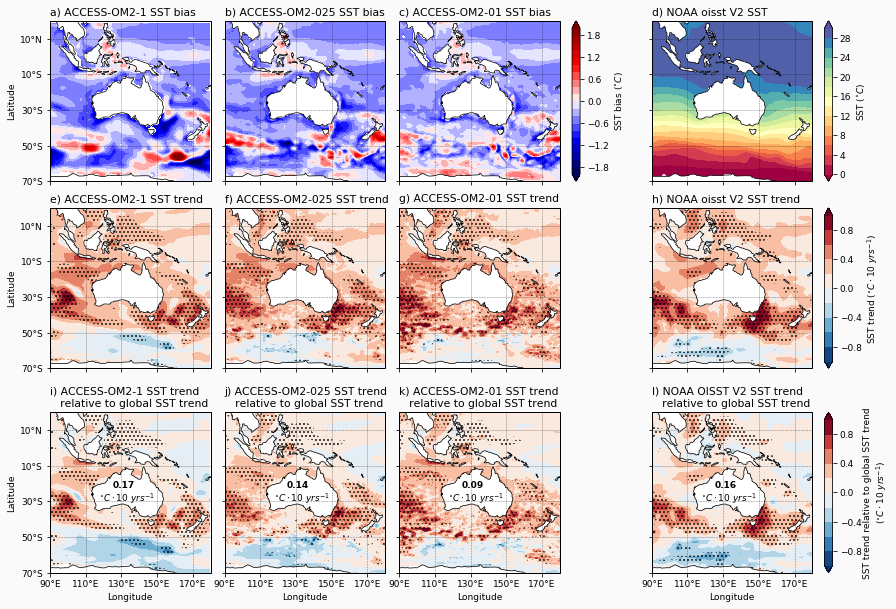

In [24]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,12), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=3
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-2,2,0.2)
cmap = plt.cm.seismic
data = temp_z0_1_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = temp_z0_025_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = temp_z0_01_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST bias ($^{\circ}C$)', cax=axins)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(0,30,2)
cmap = plt.cm.Spectral
data = temp_z0_oisst.mean('year')
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) NOAA oisst V2 SST', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.05, pos.x1+0.1075, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_slope_oisst
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_p_value_oisst
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) NOAA oisst V2 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST trend ($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)

ax = plt.subplot(row, col, 9, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_z0_1_slope_mod - temp_z0_1_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-1 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_1_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 10, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_025_slope_global_mod*4,temp_z0_025_slope_global_mod*4,temp_z0_025_slope_global_mod)
# cmap = plt.cm.RdBu_r
data = temp_z0_025_slope_mod - temp_z0_025_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-025 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_025_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 11, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_01_slope_global_mod*4,temp_z0_01_slope_global_mod*4,temp_z0_01_slope_global_mod)
# cmap = plt.cm.RdBu_r
data = temp_z0_01_slope_mod - temp_z0_01_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('k) ACCESS-OM2-01 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_01_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 12, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.08, pos.x1+0.1075, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_slope_global_oisst*4,temp_z0_slope_global_oisst*4,temp_z0_slope_global_oisst)
print(levels)
cmap = plt.cm.RdBu_r
data = temp_z0_slope_oisst - temp_z0_slope_global_oisst
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_p_value_oisst
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('l) NOAA OISST V2 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_slope_global_oisst,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label='SST trend relative to global SST trend\n'
                    +r'($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)
# cbar.set_ticks(levels)
# cbar.ax.set_yticklabels([r'$\times$ -4',r'$\times$ -3',r'$\times$ -2',r'$\times$ -1',
#                         r'$\times$ 1',r'$\times$ 2',r'$\times$ 3',r'$\times$ 4',r'$\times$ 5'])

savefigure('SST_bias_trend_0417')